In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

from sklearn.neural_network import MLPClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestRegressor

In [4]:
wine = pd.read_csv('modified_winequalityN.csv')

Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

- ### Aplicacion de PCA

In [5]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0


In [6]:
wine_n = wine.loc[ : , ['fixed acidity', 'free sulfur dioxide', 'citric acid', 'residual sugar', 'alcohol'] ].copy()

In [7]:
x = wine_n['alcohol']
y = wine_n['residual sugar']

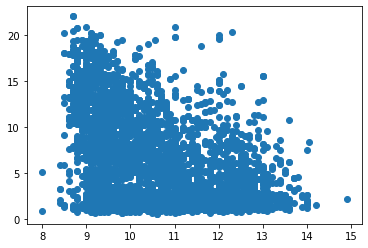

In [8]:
plt.scatter( x , y )

#### A primera impresion podemos suponer que a mayor cantidad de azucar residual representa menos el alcohol que tiene el vino, entendiendo de otra forma significa que a mayor cantidad de alcohol menos azucar residual se tiene

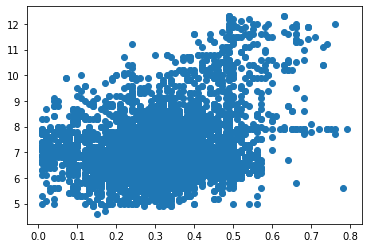

In [9]:
x = wine_n['citric acid']
y = wine_n['fixed acidity']
plt.scatter( x , y )

In [10]:
c = wine_n.corr()

In [11]:
wine_n.corr()

,fixed acidity,free sulfur dioxide,citric acid,residual sugar,alcohol
fixed acidity,1.000000,-0.291488,0.300905,-0.129816,-0.100173
free sulfur dioxide,-0.291488,1.000000,0.079855,0.454300,-0.181992
citric acid,0.300905,0.079855,1.000000,0.058040,0.040107
residual sugar,-0.129816,0.454300,0.058040,1.000000,-0.367322
alcohol,-0.100173,-0.181992,0.040107,-0.367322,1.000000


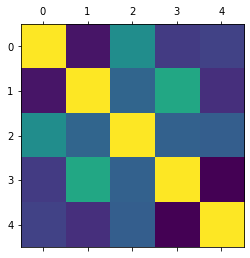

In [12]:
plt.matshow(c)

C:\Users\jcfun\AppData\Local\Temp\ipykernel_17112\1104028275.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(c, mask=np.zeros_like(c, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

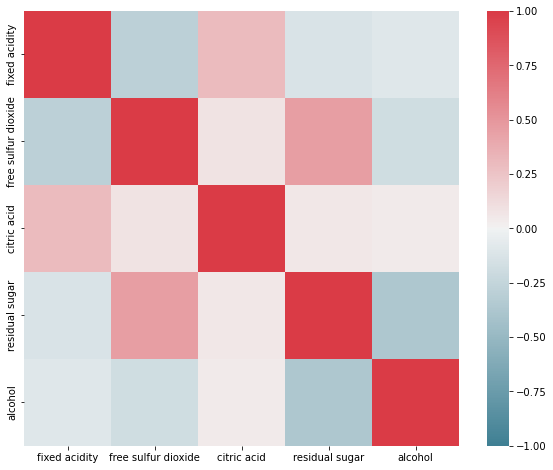

In [13]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(c, mask=np.zeros_like(c, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin = -1 , vmax= 1 )

#### Tenemos que la variable mas importante, que tiene una mayor correlacion es la variable fixed acidity
### Principal component Analysis (PCA) - implementacion

In [14]:
cols_to_use = [
    "fixed acidity"        
    , "free sulfur dioxide"
    , "citric acid"
    , "residual sugar"
    , "alcohol"    
]

In [15]:
x = wine.loc[ : , cols_to_use ].values

In [16]:
x

array([[ 7.  , 45.  ,  0.36, 20.7 ,  8.8 ],
       [ 6.3 , 14.  ,  0.34,  1.6 ,  9.5 ],
       [ 8.1 , 30.  ,  0.4 ,  6.9 , 10.1 ],
       ...,
       [ 6.3 , 29.  ,  0.13,  2.3 , 11.  ],
       [ 5.9 , 32.  ,  0.12,  2.  , 10.2 ],
       [ 6.  , 18.  ,  0.47,  3.6 , 11.  ]])

Estandarizamos los valores

In [17]:
x = StandardScaler().fit_transform(x)

In [18]:
x

array([[-0.12057464,  0.92699752,  0.36319016,  3.29887873, -1.41855821],
       [-0.73969132, -0.96657885,  0.1907427 , -0.79979913, -0.83161516],
       [ 0.852323  ,  0.01075089,  0.70808508,  0.33753033, -0.32852111],
       ...,
       [-0.73969132, -0.05033222, -1.61995564, -0.6495858 ,  0.42611996],
       [-1.09347228,  0.13291711, -1.70617937, -0.71396294, -0.2446721 ],
       [-1.00502704, -0.72224641,  1.31165119, -0.3706182 ,  0.42611996]])

In [19]:
x = np.around( x , 2 )

In [20]:
np.nan_to_num(x)

array([[-0.12,  0.93,  0.36,  3.3 , -1.42],
       [-0.74, -0.97,  0.19, -0.8 , -0.83],
       [ 0.85,  0.01,  0.71,  0.34, -0.33],
       ...,
       [-0.74, -0.05, -1.62, -0.65,  0.43],
       [-1.09,  0.13, -1.71, -0.71, -0.24],
       [-1.01, -0.72,  1.31, -0.37,  0.43]])

### PCA

In [21]:
pca = PCA( n_components = 2 )

In [22]:
principalComponents = pca.fit_transform(x)

In [23]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

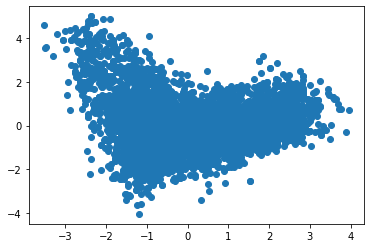

In [24]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

### KMeans

In [25]:
km = KMeans( n_clusters = 3  ).fit(pcadf)

In [26]:
km.cluster_centers_

array([[-0.50036886, -0.67230725],
       [-1.40569795,  1.61919773],
       [ 1.69631188,  0.38337635]])

In [27]:
cetroids = km.cluster_centers_

In [28]:
km.labels_[:500]

array([2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0,

In [29]:
pcadf

,c1,c2
0,3.210014,1.149797
1,-0.513982,-0.221190
2,0.076435,1.193510
3,1.234709,0.300866
4,1.234709,0.300866
...,...,...
6492,-0.053890,-1.998760
6493,0.059485,-2.259705
6494,-0.338056,-1.783373
6495,0.116776,-1.877456


In [30]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0


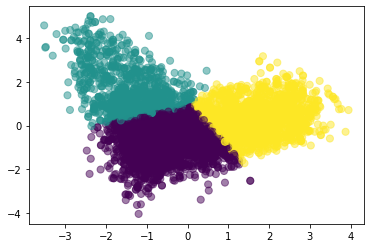

In [31]:
plt.scatter( pcadf['c1'] , pcadf['c2'] , c=km.labels_.astype(float) , s=50, alpha=0.5 )

In [32]:
wine_MLNS = wine.copy()
wine_MLNS['cluster'] = km.labels_
wine_MLNS

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0,2
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0,0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0,0


In [33]:
wine_MLNS.loc[ wine_MLNS['cluster'] == 0 , : ].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
count,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.0
mean,6.762009,0.342710,0.273721,3.158436,0.048553,25.558576,101.817545,0.993090,3.248635,0.511697,10.977694,5.933016,0.0
std,0.752482,0.167199,0.099723,2.416576,0.019423,12.444137,45.403401,0.002554,0.153864,0.119050,1.164240,0.919677,0.0
min,4.600000,0.080000,0.010000,0.700000,0.015000,2.000000,7.000000,0.987110,2.820000,0.220000,8.000000,3.000000,0.0
25%,6.200000,0.230000,0.230000,1.600000,0.035000,16.000000,73.000000,0.991200,3.140000,0.420000,10.000000,5.000000,0.0
50%,6.800000,0.290000,0.290000,2.200000,0.043000,25.000000,105.000000,0.992820,3.250000,0.500000,10.900000,6.000000,0.0
75%,7.200000,0.410000,0.330000,4.200000,0.059000,34.000000,131.000000,0.994900,3.360000,0.590000,11.900000,7.000000,0.0
max,9.900000,1.005000,0.570000,15.750000,0.119000,74.000000,251.000000,1.038980,3.680000,0.970000,14.200000,9.000000,0.0


In [34]:
wine_MLNS.loc[ wine_MLNS['cluster'] == 1 , : ].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0
mean,8.900699,0.392068,0.436602,2.459951,0.069714,15.541463,60.920000,0.996396,3.197676,0.609385,10.512309,5.734634,1.0
std,1.288680,0.168208,0.114720,1.480595,0.022036,9.759010,44.320383,0.002648,0.130594,0.146648,1.007628,0.855714,0.0
min,5.600000,0.080000,0.100000,0.600000,0.017000,1.000000,6.000000,0.990000,2.830000,0.270000,8.400000,3.000000,1.0
25%,7.900000,0.260000,0.360000,1.800000,0.051000,7.000000,24.000000,0.994440,3.120000,0.510000,9.700000,5.000000,1.0
50%,8.600000,0.360000,0.440000,2.200000,0.074000,13.000000,47.000000,0.996800,3.200000,0.610000,10.400000,6.000000,1.0
75%,9.800000,0.490000,0.490000,2.600000,0.084000,22.000000,93.000000,0.998200,3.280000,0.710000,11.200000,6.000000,1.0
max,12.300000,1.010000,0.790000,11.700000,0.119000,46.000000,207.000000,1.003690,3.660000,0.990000,14.900000,8.000000,1.0


In [35]:
wine_MLNS.loc[ wine_MLNS['cluster'] == 2 , : ].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.0
mean,6.887946,0.267164,0.336713,10.934553,0.046741,45.506040,167.245536,0.996793,3.156374,0.482721,9.570221,5.648634,2.0
std,0.638965,0.072216,0.092720,4.160341,0.008149,13.545057,34.475295,0.001975,0.130112,0.089476,0.690173,0.752622,0.0
min,4.900000,0.105000,0.100000,0.900000,0.015000,6.000000,67.000000,0.990200,2.850000,0.270000,8.000000,3.000000,2.0
25%,6.400000,0.220000,0.270000,7.800000,0.042000,35.000000,143.000000,0.995440,3.070000,0.420000,9.100000,5.000000,2.0
50%,6.800000,0.260000,0.320000,11.100000,0.046000,46.000000,167.000000,0.996800,3.150000,0.475000,9.400000,6.000000,2.0
75%,7.300000,0.310000,0.400000,13.900000,0.052000,55.000000,191.000000,0.998200,3.230000,0.530000,9.900000,6.000000,2.0
max,8.700000,0.480000,0.570000,22.000000,0.071000,80.000000,255.000000,1.010300,3.560000,0.760000,12.500000,9.000000,2.0


### Perfiles
- #### Para el cluster con el valor de 0, nos indica aquellos vinos con el menor valor en cuanto alcohol y con mayor presencia de azucar residual y dioxido de azufre libre.
- #### Para el cluster con el valor de 1, tenemos que se encuentra en un punto de medio la cantidad de alcohol respecto a los demas, ademas son los vinos que presentan menor cantidad de azucar residual y una mayor acidez citrica
- #### Para el cluster con el valor de 2, a este pertenecen los que mayor valor de alcohol tienen y los que menos acidez citrica tienen, debido al valor de acohol y acidez citrica la azucar residual esta en un punto medio

- ### Variable de respuesta quality >= 5 ? 1 else 0

In [36]:
wine_MLNS["most quality"] = wine_MLNS.apply( lambda r: (1 if r['quality'] >= 5 else 0) , axis = 1)

In [37]:
wine_MLNS

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,most quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0,2,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0,0,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0,1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,2,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0,0,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0,0,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0,0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0,0,1


#### Eliminacion de variable quality y variables que formaron parte del PCA

In [38]:
wine_MLNS = wine_MLNS.drop(columns = ['fixed acidity', 'free sulfur dioxide', 'citric acid', 'residual sugar', 'alcohol', 'quality'])

In [39]:
wine_MLNS

,type,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,cluster,most quality
0,white,0.270,0.045,170.0,1.00100,3.00,0.450000,2,1
1,white,0.300,0.049,132.0,0.99400,3.30,0.490000,0,1
2,white,0.280,0.050,97.0,0.99510,3.26,0.440000,1,1
3,white,0.230,0.058,186.0,0.99560,3.19,0.400000,2,1
4,white,0.230,0.058,186.0,0.99560,3.19,0.400000,2,1
...,...,...,...,...,...,...,...,...,...
6492,red,0.600,0.090,44.0,0.99490,3.45,0.580000,0,1
6493,red,0.550,0.062,51.0,0.99512,3.52,0.531215,0,1
6494,red,0.510,0.076,40.0,0.99574,3.42,0.750000,0,1
6495,red,0.645,0.075,44.0,0.99547,3.57,0.710000,0,1


- ### Entrenamientos MLS

#### Como ejemplo se hara el etrenamiento para la variable de respuesta de respuesta que se creo con quality en la cual se calcula si "quality >= 5", se calculara su valor en funcion de las demas variables, no se estratificara porque considero que no varia tanto en sus valores sea type "white" o "red"

In [40]:
wine_MLS = wine.copy()

### Regresion Logistica

In [41]:
wine_MLS = wine_MLS.drop(columns = ['type','quality'])
wine_MLS['most quality'] = wine_MLNS['most quality']

In [42]:
features_col = wine_MLS.columns.values[0:11]

In [43]:
X = wine_MLS[features_col].values
y = wine_MLS['most quality'].values

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [45]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred  = log_model.predict(X_test)

In [47]:
y_pred[:200]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [48]:
Y_test[:200]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [49]:
log_model.predict_proba(X_test)[:,1]

array([0.97374497, 0.94097376, 0.97135006, ..., 0.86472901, 0.99735524,
       0.94071085])

In [50]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

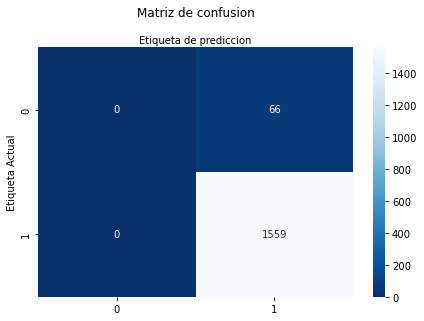

In [51]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

#### Al hacer el analisis de la matriz de confusión del modelo tenemos que se tuvieron 66 casos de falsos positivos donde el modelo se equivoca

In [52]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.9593846153846154
0.9593846153846154
1.0
0.9792713567839196


In [53]:
metrics.roc_auc_score(Y_test, y_pred)

0.5

### Neuronal Network

In [54]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test

In [55]:
# Making the Neural Network Classifier
NN = MLPClassifier(random_state=1, max_iter=1000)

# Training the model on the training data and labels
NN.fit(x_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(x_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [56]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9593846153846154
0.9593846153846154
1.0
0.9792713567839196


### Arboles de desiciones

In [57]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [58]:
tree_one = tree_one.fit( x_train , y_train )

In [59]:
tree_one.tree_.max_depth

21

In [60]:
y_pred = tree_one.predict(x_test)

In [61]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.931076923076923
0.9640795381654907
0.9640795381654907
0.9640795381654907


### Rando Forest

In [62]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train , y_train);

In [63]:
y_pred = rf.predict(x_test) >= 0.5

In [64]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9624615384615385
0.963490099009901
0.9987171263630532
0.9807874015748032


#### Una vez realizando todos los tipos de entranamientos y analizando cada uno de sus resultados el que mejor resultados obtuvo es el random forest, porque si bien el recoil es mas alto en los otros tipos de entramientos es por la minima y en los demas valores el random forest ofrece resultados mas altos, por lo cual considero que es, el que ofrece valores mas altos y balanceados.
#### El Random forest ofrece mejores resultados en cuanto a precision, exactitud y F1 beta score